# Predicting the Price of a House Based on Various Predictors

### Introduction

It is no secret that the price of housing in the United States has skyrocketed in the past decade. Homeowners are continuously struggling to find a suitable home for their specific needs, that is within their personal budget. In this data science project, we are trying to determine:

Is it possible to predict the cost of a house based on area, number of bedrooms, number of bathrooms and number of stories?

The dataset being used for this analysis is called: Housing Prices Dataset which was obtained from Kaggle and contains data from 2021. The original dataset contained 13 columns, 1 of which is the price.


### Preliminary Exploratory Data Analysis
Below we have gotten our data from the web onto R, and have split our data in to training and testing data, with a 75/25 ratio

In [14]:
library(tidyverse)
library(repr)
library(tidymodels)




Housing <- read_csv("https://raw.githubusercontent.com/jio7887oij/dsci-100-009-1/main/Housing.csv")

housing_split <- initial_split(Housing, prop = 0.75, strata = price)
housing_train <- training(housing_split)
housing_test <- testing(housing_split)
housing_train

Rows: 545 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): mainroad, guestroom, basement, hotwaterheating, airconditioning, pr...
dbl (6): price, area, bedrooms, bathrooms, stories, parking

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
3430000,4000,2,1,1,yes,no,no,no,no,0,no,unfurnished
3430000,3185,2,1,1,yes,no,no,no,no,2,no,unfurnished
3430000,3850,3,1,1,yes,no,no,no,no,0,no,unfurnished
3430000,2610,3,1,2,yes,no,yes,no,no,0,yes,unfurnished
3430000,1950,3,2,2,yes,no,yes,no,no,0,yes,unfurnished
3423000,4040,2,1,1,yes,no,no,no,no,0,no,unfurnished
3395000,4785,3,1,2,yes,yes,yes,no,yes,1,no,furnished
3395000,3640,2,1,1,yes,no,no,no,no,0,no,furnished
3360000,3500,4,1,2,yes,no,no,no,yes,2,no,unfurnished


Below are scatter plots and bar graphs comparing the initial dataset with the predictors

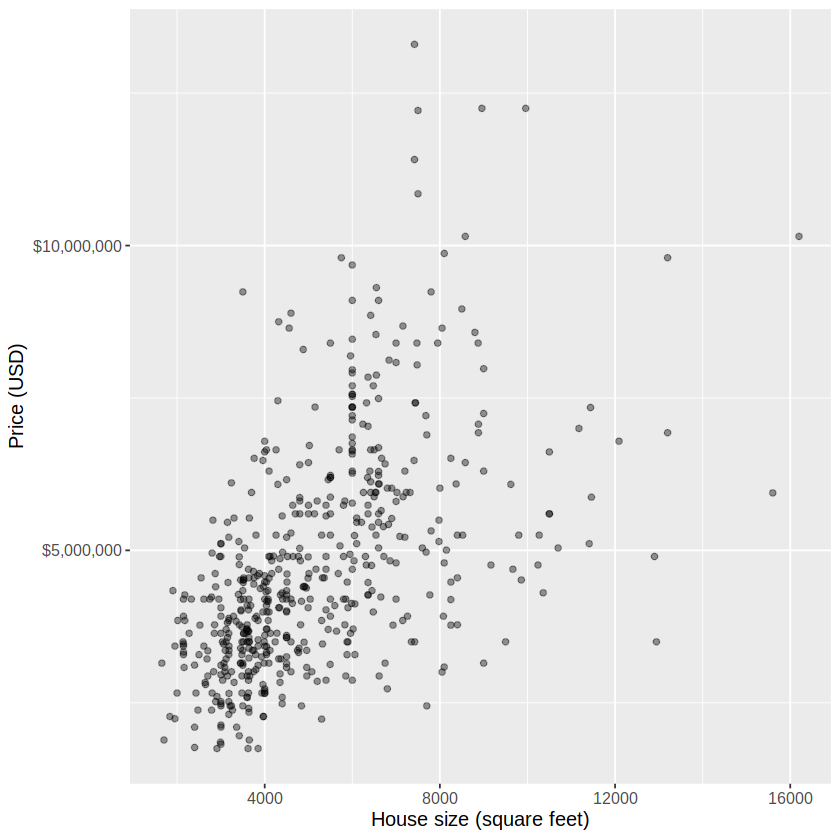

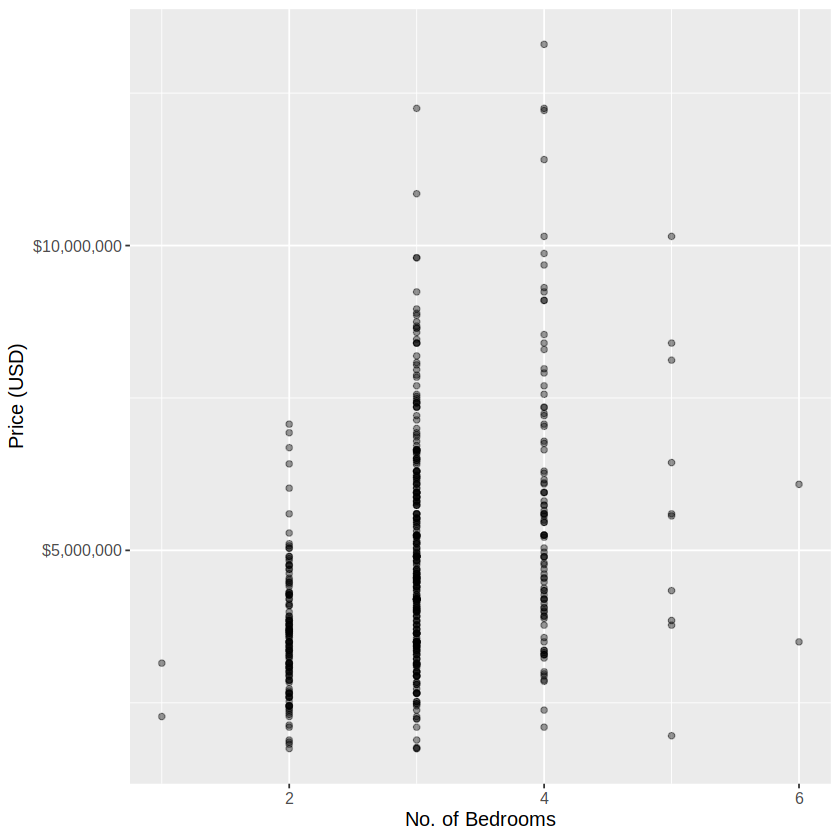

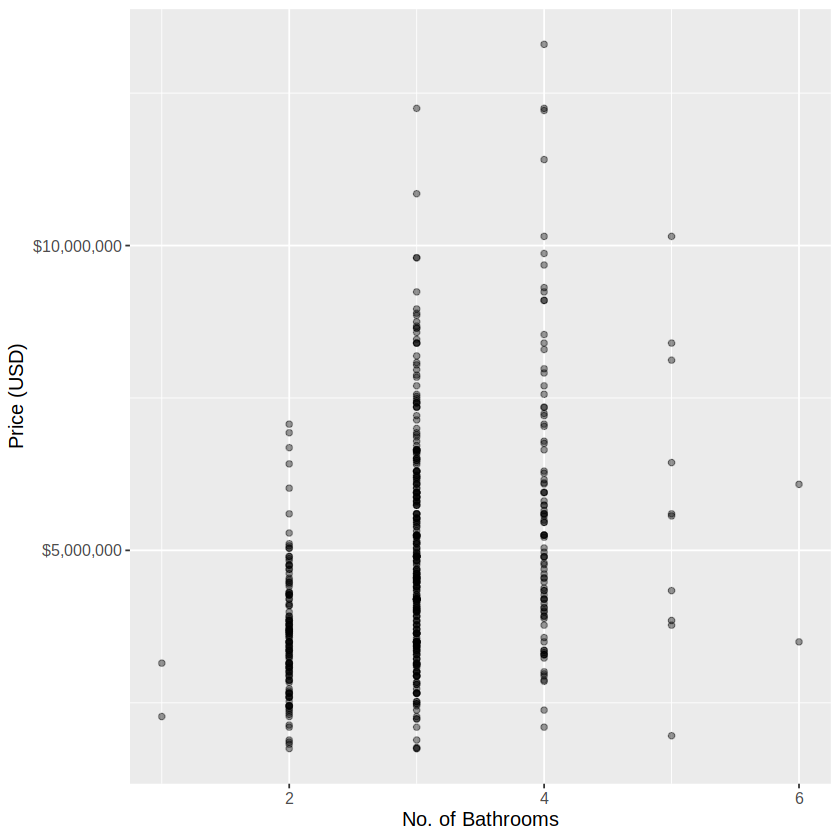

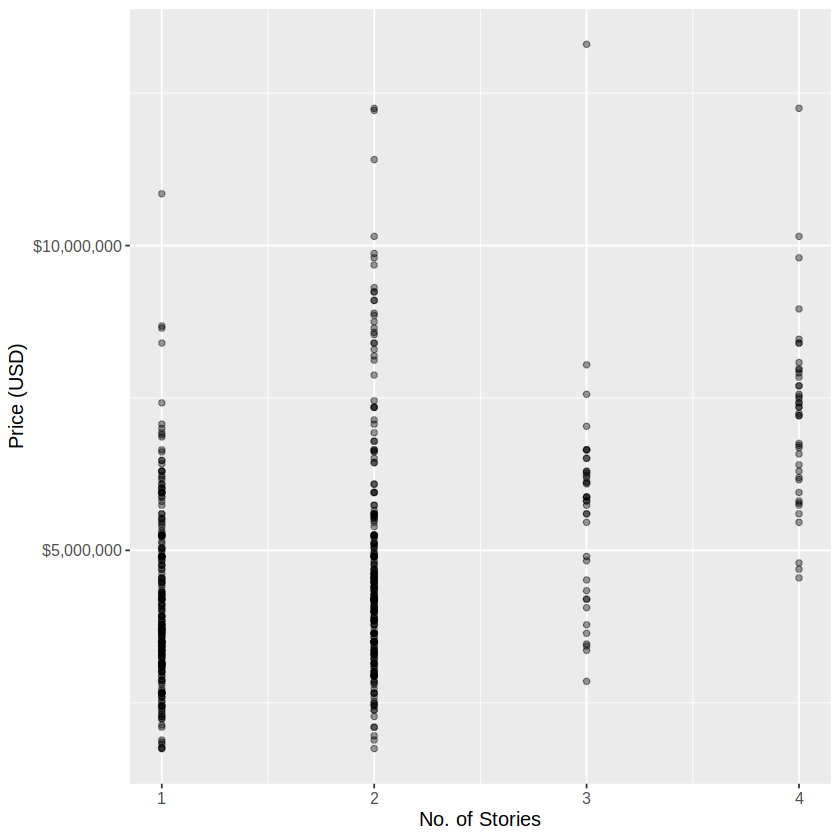

In [9]:
preview_1 <- ggplot(Housing, aes(x = area, y = price)) +
  geom_point(alpha = 0.4) +
  xlab("House size (square feet)") +
  ylab("Price (USD)") +
  scale_y_continuous(labels = dollar_format()) + 
  theme(text = element_text(size = 12))

preview_1

preview_2 <- ggplot(Housing, aes(x = bedrooms, y = price)) +
  geom_point(alpha = 0.4) +
  xlab("No. of Bedrooms") +
  ylab("Price (USD)") +
  scale_y_continuous(labels = dollar_format()) + 
  theme(text = element_text(size = 12))

preview_2

preview_3 <- ggplot(Housing, aes(x = bedrooms, y = price)) +
  geom_point(alpha = 0.4) +
  xlab("No. of Bathrooms") +
  ylab("Price (USD)") +
  scale_y_continuous(labels = dollar_format()) + 
  theme(text = element_text(size = 12))

preview_3

preview_4 <- ggplot(Housing, aes(x = stories, y = price)) +
  geom_point(alpha = 0.4) +
  xlab("No. of Bathrooms") +
  ylab("Price (USD)") +
  scale_y_continuous(labels = dollar_format()) + 
  theme(text = element_text(size = 12))

preview_4

Below we wrangled the training data, and have visualized our classifications (No. of Bedrooms, Bathrooms, and Stories) into tables, which show the average price and area, as well as how many of each class are in the training data. We chose to remove some values for bedrooms and bathrooms because there was not enough data.

In [19]:
housing_train_selected <- housing_train |>
    select(price, area, as_factor("bedrooms"), as_factor("bathrooms"), as_factor("stories")) |>
    filter(bedrooms == 2 | bedrooms == 3 | bedrooms == 4) |>
    filter(bathrooms == 1 | bathrooms == 2)

housing_train_bedrooms <- housing_train_selected |>
    group_by(bedrooms) |>
    summarize(avg_price = mean(price), avg_area = mean(area), observations = n())

housing_train_bathrooms <- housing_train_selected |>
    group_by(bathrooms) |>
    summarize(avg_price = mean(price), avg_area = mean(area), observations = n())

housing_train_stories <- housing_train_selected |>
    group_by(stories) |>
    summarize(avg_price = mean(price), avg_area = mean(area), observations = n())


housing_train_bedrooms

housing_train_bathrooms

housing_train_stories


bedrooms,avg_price,avg_area,observations
<dbl>,<dbl>,<dbl>,<int>
2,3673800,4760.543,105
3,4931975,5175.577,220
4,5547294,5631.382,68


bathrooms,avg_price,avg_area,observations
<dbl>,<dbl>,<dbl>,<int>
1,4218423,4974.860,292
2,6101188,5631.277,101


stories,avg_price,avg_area,observations
<dbl>,<dbl>,<dbl>,<int>
1,4146396,5299.107,168
2,4679353,4685.671,167
3,5700827,5656.654,26
4,6929108,6299.625,32


Below we plotted the price against the area using the training data, and showed the number of bedrooms/bathrooms/stories each data point has

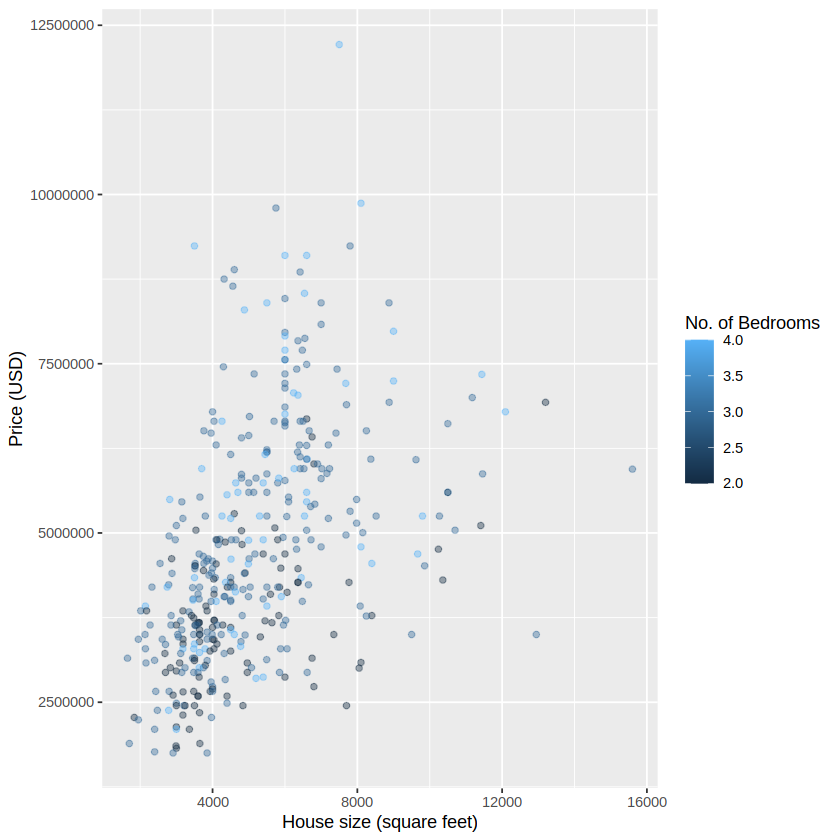

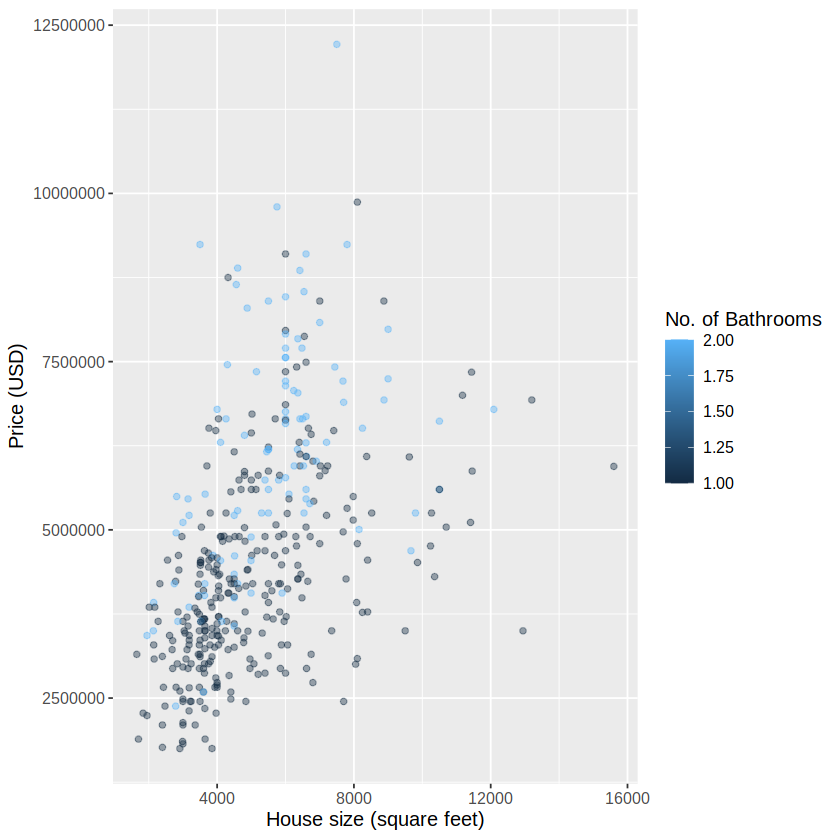

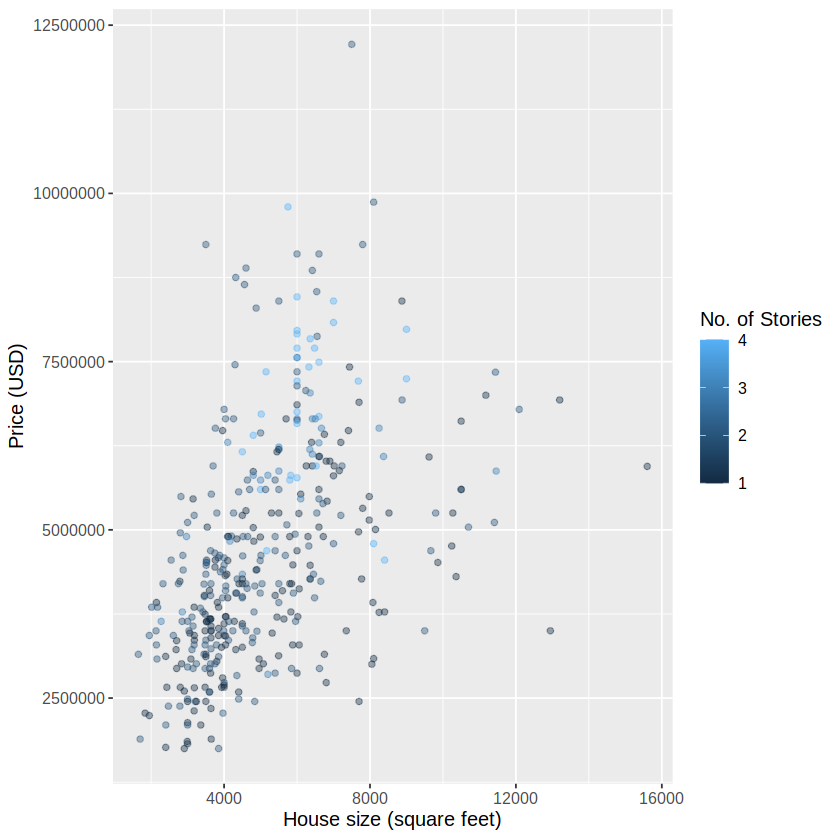

In [23]:
housing_plot_bedrooms <- ggplot(housing_train_selected, aes(x = area, y = price, color = bedrooms)) +
  geom_point(alpha = 0.4) +
  xlab("House size (square feet)") +
  ylab("Price (USD)") +
  labs(color = "No. of Bedrooms") +
  theme(text = element_text(size = 12))

housing_plot_bathrooms <- ggplot(housing_train_selected, aes(x = area, y = price, color = bathrooms)) +
  geom_point(alpha = 0.4) +
  xlab("House size (square feet)") +
  ylab("Price (USD)") +
  labs(color = "No. of Bathrooms") +
  theme(text = element_text(size = 12))

housing_plot_stories <- ggplot(housing_train_selected, aes(x = area, y = price, color = stories)) +
  geom_point(alpha = 0.4) +
  xlab("House size (square feet)") +
  ylab("Price (USD)") +
  labs(color = "No. of Stories") +
  theme(text = element_text(size = 12))

housing_plot_bedrooms

housing_plot_bathrooms

housing_plot_stories

### Methods

The data analysis will be conducted using regression, where we will use 4 predictors (area, # of bathrooms, # of bedrooms and # of stories) to predict the value of a response variable (price of the house)

First, we have checked that the data in the data frame is already tidy. There is no missing data or more than one value in one cell. Then, we plot scatter plots to find the variables that have a relationship with price. From wrangling the data and plotting graphs, we have decided the four variables: area, bathrooms, bedrooms and stories, to be our predictors.  We have also split the data with 75% of data being the training set, and 25% of data being the test set. 

Next, we will perform cross-validation to tune the classifier and to decide the number of knn neighbors we are going to use for this classifier. Meanwhile, we will also check if using the four variables as predictors will result in the best classifier that can predict the price of housing. 

The results will first be visualized on a scatter plot and a line graph, which we can use to determine whether we can predict the the price, and how accurately.

### Expected Outcomes and Significance

We expect to find a positive relationship between the price of houses and all the predictors. Therefore, homes with a greater area and a higher number of bedrooms, stories and bathrooms will be more expensive.
This could greatly assist families/individuals in searching for a home, since having an accurate idea of pricing on a house that suits their personal needs, could help formulate budgeting plans to ease overall financial stress. In addition, this data analysis could lead to future questions concerning inflation of housing costs. For example, if we are able to compare the housing cost prediction of set variable values with a dataset obtained in a couple of years from now, it will be evident to see how much the costs have inflated.
